In [1]:
%matplotlib inline
%autosave 0
%load_ext autoreload
%autoreload 2

Autosave disabled


In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dtrace import rpath
from scipy.stats import pearsonr
from Associations import Association
from dtrace.RobustAssociations import RobustAssociations

### Import data-sets and associations

In [3]:
assoc = Association(dtype="ic50", load_associations=True, load_robust=True)

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


[2019-02-21 14:33:33,793 - INFO]: #(Samples)=500
[2019-02-21 14:33:35,988 - INFO]: #(Drugs)=579; #(Genes)=16818; #(Genomic)=536; 


In [4]:
robust = RobustAssociations(assoc)

## Robust pharmacogenomic associations

Robust pharmacogenomic associations represent pairs of Drug-Gene (drug-response and gene-essentiality) that are
significantly correlated with each other and with a genomic feature (copy-number/mutations) or a gene expression
profile.

In [7]:
robust.assoc.lmm_robust_genomic.query("crispr_fdr < 0.1 & drug_fdr < 0.1").head(15).sort_values("drug_fdr")

,DRUG_ID,DRUG_NAME,VERSION,beta,pval,GeneSymbol,n_samples,fdr,DRUG_TARGETS,target_detailed,target,feature,drug_beta,drug_pval,drug_fdr,crispr_beta,crispr_pval,crispr_fdr
0,1373,Dabrafenib,v17,0.492533,4.881247e-20,BRAF,439,8.209282e-16,BRAF,T,T,BRAF_mut,-1.981553,1.999609e-21,1.035797e-18,-2.105672,4.459566e-26,2.390327e-23
1,1373,Dabrafenib,v17,0.307292,3.153813e-09,MAPK1,439,5.304082e-05,BRAF,1,1,BRAF_mut,-1.981553,1.999609e-21,1.035797e-18,-1.641637,1.956768e-18,1.048828e-15
2,1373,Dabrafenib,v17,0.281908,1.765348e-07,PEA15,439,2.968963e-03,BRAF,2,2,BRAF_mut,-1.981553,1.999609e-21,1.035797e-18,-1.339092,1.429508e-15,7.662162e-13
3,1061,SB590885,v17,0.353515,3.120102e-10,BRAF,421,5.247388e-06,BRAF,T,T,BRAF_mut,-1.589553,2.594821e-16,1.292221e-13,-2.105672,4.459566e-26,2.390327e-23
4,1061,SB590885,v17,0.299236,1.691244e-08,MAPK1,421,2.844335e-04,BRAF,1,1,BRAF_mut,-1.589553,2.594821e-16,1.292221e-13,-1.641637,1.956768e-18,1.048828e-15
5,1061,SB590885,v17,0.375733,6.322182e-08,SOX10,421,1.063265e-03,BRAF,No link; Gene not in network,-,BRAF_mut,-1.589553,2.594821e-16,1.292221e-13,-1.091492,2.591679e-10,1.389140e-07
6,1061,SB590885,v17,0.295908,4.988883e-07,MITF,421,8.390303e-03,BRAF,2,2,BRAF_mut,-1.589553,2.594821e-16,1.292221e-13,-0.983341,8.632551e-09,4.627048e-06
7,1061,SB590885,v17,0.295016,7.031216e-07,DUSP4,421,1.182510e-02,BRAF,2,2,BRAF_mut,-1.589553,2.594821e-16,1.292221e-13,-0.995540,7.767501e-09,4.163381e-06
8,1036,PLX-4720,v17,0.321484,1.606201e-08,BRAF,431,2.701309e-04,BRAF,T,T,BRAF_mut,-1.506183,5.410583e-15,2.721523e-12,-2.105672,4.459566e-26,2.390327e-23
9,1036,PLX-4720,v17,0.276505,2.383971e-06,MITF,431,4.009362e-02,BRAF,2,2,BRAF_mut,-1.506183,5.410583e-15,2.721523e-12,-0.983341,8.632551e-09,4.627048e-06


In [8]:
robust.assoc.lmm_robust_gexp.query("crispr_fdr < 0.1 & drug_fdr < 0.1").head(15).sort_values("drug_fdr")

,DRUG_ID,DRUG_NAME,VERSION,beta,pval,GeneSymbol,n_samples,fdr,DRUG_TARGETS,target_detailed,target,feature,drug_beta,drug_pval,drug_fdr,crispr_beta,crispr_pval,crispr_fdr
5,2354,MCL1_8070,RS,0.519382,4.277158e-37,MCL1,405,7.193324e-33,MCL1,T,T,BCL2L1,0.527620,1.191093e-14,1.830471e-10,0.457291,7.504847e-11,1.153345e-06
7,1047,Nutlin-3a (-),v17,0.491076,1.507345e-17,MDM2,431,2.535052e-13,MDM2,T,T,MDM2,-0.383170,1.900621e-13,2.920875e-09,-0.355285,3.181418e-13,4.889204e-09
10,1047,Nutlin-3a (-),v17,-0.447408,2.557957e-09,TP53,431,4.301973e-05,MDM2,1,1,MDM2,-0.383170,1.900621e-13,2.920875e-09,0.270228,1.909789e-07,2.934964e-03
12,1047,Nutlin-3a (-),v17,-0.329932,4.463463e-07,USP28,431,7.506652e-03,MDM2,3,3,MDM2,-0.383170,1.900621e-13,2.920875e-09,0.301847,7.361185e-09,1.131267e-04
14,1956,MCL1_1284,RS,0.519598,4.222036e-38,MCL1,409,7.100621e-34,MCL1,T,T,BCL2L1,0.503033,2.965880e-13,4.557964e-09,0.457291,7.504847e-11,1.153345e-06
17,1047,Nutlin-3a (-),v17,0.491076,1.507345e-17,MDM2,431,2.535052e-13,MDM2,T,T,FDXR,-0.406655,3.328614e-13,5.115413e-09,-0.422127,2.165762e-15,3.328342e-11
18,1047,Nutlin-3a (-),v17,0.379778,1.403469e-12,MDM4,431,2.360354e-08,MDM2,1,1,FDXR,-0.406655,3.328614e-13,5.115413e-09,-0.313428,1.126978e-08,1.731940e-04
19,1047,Nutlin-3a (-),v17,0.388768,9.429342e-12,PPM1D,431,1.585827e-07,MDM2,1,1,FDXR,-0.406655,3.328614e-13,5.115413e-09,-0.298786,4.023234e-08,6.182906e-04
20,1047,Nutlin-3a (-),v17,-0.447408,2.557957e-09,TP53,431,4.301973e-05,MDM2,1,1,FDXR,-0.406655,3.328614e-13,5.115413e-09,0.356240,1.975026e-10,3.035220e-06
21,1047,Nutlin-3a (-),v17,0.318837,3.670180e-07,USP7,431,6.172509e-03,MDM2,1,1,FDXR,-0.406655,3.328614e-13,5.115413e-09,-0.284185,6.377354e-07,9.800718e-03


Frequency of the genomic features across the cancer cell lines

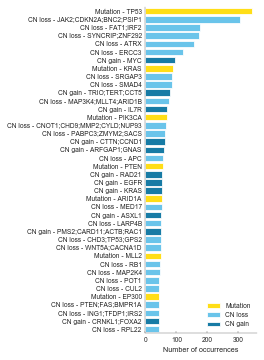

In [9]:
robust.genomic_histogram()
plt.savefig(
    f"{rpath}/robust_mobems_countplot.pdf", bbox_inches="tight", transparent=True
)

Top associations of drug and CRISPR wiht genomic features

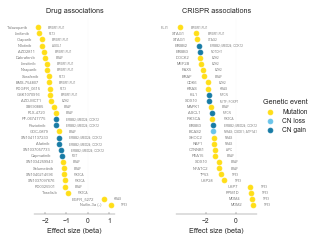

In [18]:
robust.top_robust_features()
plt.savefig(
    f"{rpath}/robust_top_associations.pdf", bbox_inches="tight", transparent=True
)

Top associations of drug and CRISPR with gene-expression

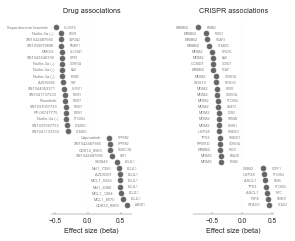

In [19]:
robust.top_robust_features(dtype="gene-expression")
plt.savefig(
    f"{rpath}/robust_top_associations_gexp.pdf", bbox_inches="tight", transparent=True
)

Significant associations count

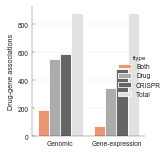

In [20]:
robust.robust_associations_barplot()
plt.gcf().set_size_inches(2, 2)
plt.savefig(
    f"{rpath}/robust_signif_association_barplot.pdf",
    bbox_inches="tight",
    transparent=True,
)

Significant associations count distributed by distance in the protein-protein interaction network

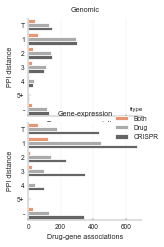

In [21]:
robust.robust_associations_barplot_ppi()
plt.gcf().set_size_inches(2, 3)
plt.savefig(
    f"{rpath}/robust_signif_association_barplot_ppi.pdf",
    bbox_inches="tight",
    transparent=True,
)

Representative examples of robust pharmacogenomic associations with copy-number and mutations

In [22]:
rassocs = [
    ("Olaparib", "FLI1", "EWSR1.FLI1_mut"),
    ("Dabrafenib", "BRAF", "BRAF_mut"),
    ("Nutlin-3a (-)", "MDM2", "TP53_mut"),
    ("Taselisib", "PIK3CA", "PIK3CA_mut"),
    ("MCL1_1284", "MCL1", "EZH2_mut"),
]

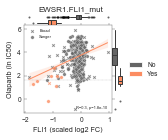

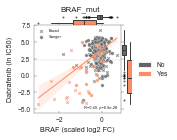

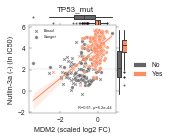

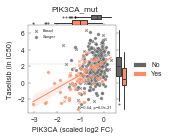

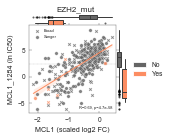

In [32]:
# d, c, g = ('Linifanib', 'STAT5B', 'XRN1_mut')
for d, c, g in rassocs:
    pair = robust.assoc.by(
        robust.assoc.lmm_robust_genomic, drug_name=d, gene_name=c, feature=g
    ).iloc[0]

    drug = tuple(pair[robust.assoc.dcols])

    dmax = np.log(robust.assoc.drespo_obj.maxconcentration[drug])

    plot_df = robust.assoc.build_df(
        drug=[drug], crispr=[c], genomic=[g], sinfo=["institute"]
    ).dropna()
    plot_df = plot_df.rename(columns={drug: "drug"})
    
    grid = robust.plot_corrplot_discrete(f"crispr_{c}", "drug", g, "institute", plot_df)

    grid.ax_joint.axhline(
        y=dmax, linewidth=0.3, color=robust.PAL_DTRACE[2], ls=":", zorder=0
    )

    grid.set_axis_labels(f"{c} (scaled log2 FC)", f"{d} (ln IC50)")

    plt.suptitle(g, y=1.05, fontsize=8)

    plt.gcf().set_size_inches(1.5, 1.5)
    plt.savefig(
        f"{rpath}/robust_scatter_{d}_{c}_{g}.pdf", bbox_inches="tight", transparent=True
    )
    plt.show()

Representative examples of robust pharmacogenomic associations with gene-expression

In [34]:
rassocs = [
    ("MCL1_1284", "MCL1", "BCL2L1"),
    ("Linsitinib", "IGF1R", "IGF1R"),
    ("SN1041137233", "ERBB2", "ERBB2"),
    ("Nutlin-3a (-)", "MDM2", "BAX"),
    ("Venetoclax", "BCL2", "CDC42BPA"),
    ("AZD5582", "MAP3K7", "TNF"),
    ("SN1021632995", "MAP3K7", "TNF"),
    ("SN1043546339", "MAP3K7", "TNF"),
]

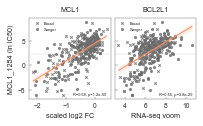

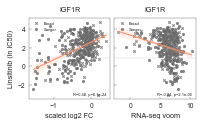

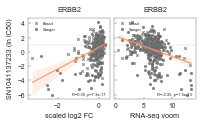

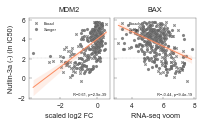

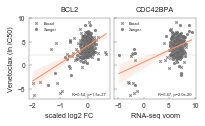

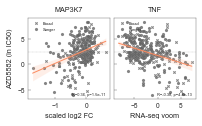

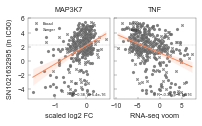

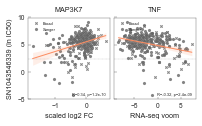

In [37]:
for d, c, g in rassocs:
    pair = robust.assoc.by(
        robust.assoc.lmm_robust_gexp, drug_name=d, gene_name=c, feature=g
    ).iloc[0]

    drug = tuple(pair[robust.assoc.dcols])
    dmax = np.log(robust.assoc.drespo_obj.maxconcentration[drug])

    plot_df = robust.assoc.build_df(
        drug=[drug], crispr=[c], gexp=[g], sinfo=["institute", "cancer_type"]
    ).dropna()
    plot_df = plot_df.rename(columns={drug: "drug"})

    #
    fig, axs = plt.subplots(1, 2, sharey="row", sharex="none")

    for i, dtype in enumerate(["crispr", "gexp"]):
        # Scatter
        for t, df in plot_df.groupby("institute"):
            axs[i].scatter(
                x=df[f"{dtype}_{c}" if dtype == "crispr" else f"{dtype}_{g}"],
                y=df["drug"],
                edgecolor="w",
                lw=0.05,
                s=10,
                color=robust.PAL_DTRACE[2],
                marker=robust.MARKERS[t],
                label=t,
                alpha=0.8,
            )

        # Reg
        sns.regplot(
            x=plot_df[f"{dtype}_{c}" if dtype == "crispr" else f"{dtype}_{g}"],
            y=plot_df["drug"],
            data=plot_df,
            color=robust.PAL_DTRACE[1],
            truncate=True,
            fit_reg=True,
            scatter=False,
            line_kws=dict(lw=1.0, color=robust.PAL_DTRACE[0]),
            ax=axs[i],
        )

        # Annotation
        cor, pval = pearsonr(plot_df[f"{dtype}_{c}" if dtype == "crispr" else f"{dtype}_{g}"], plot_df["drug"])
        annot_text = f"R={cor:.2g}, p={pval:.1e}"

        axs[i].text(
            0.95, 0.05, annot_text, fontsize=4, transform=axs[i].transAxes, ha="right"
        )

        # Misc
        axs[i].axhline(
            y=dmax, linewidth=0.3, color=robust.PAL_DTRACE[2], ls=":", zorder=0
        )

        axs[i].set_ylabel(f"{d} (ln IC50)" if i == 0 else "")
        axs[i].set_xlabel(f"scaled log2 FC" if dtype == "crispr" else f"RNA-seq voom")
        axs[i].set_title(c if dtype == "crispr" else g)

        # Legend
        axs[i].legend(prop=dict(size=4), frameon=False, loc=2)

    plt.subplots_adjust(wspace=0.05)
    plt.gcf().set_size_inches(3, 1.5)
    plt.savefig(
        f"{rpath}/robust_scatter_gexp_{d}_{c}_{g}.pdf",
        bbox_inches="tight",
        transparent=True,
    )
    plt.show()